In [ ]:
# Import Libraries and Files
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from tensorflow.keras.layers import LSTM, Dense, Conv1D, LeakyReLU
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from pickle import load
import pandas as pd
from tqdm import tqdm
from model_building_5 import (  # Import functions from model_building.py
    make_generator_model,
    make_discriminator_model,
    discriminator_loss,
    generator_loss,
    train_step,
    train,
    eval_op,
    plot_results,
    plot_test_data,
    evaluate_model
)




In [42]:
# Set the stock name for saving models and plots
stock_name = "AMZN"

In [43]:
# Load the saved datasets
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')
yc_train = np.load('yc_train.npy')
yc_test = np.load('yc_test.npy')



In [44]:
# Define input dimensions
input_dim = X_train.shape[1]  # Number of time steps (sequence length)
feature_size = X_train.shape[2]  # Number of features in each time step
output_dim = y_train.shape[1]  # Number of outputs to predict (forecasting horizon)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (207, 5, 15)
X_test shape: (20, 5, 15)
y_train shape: (207, 1)
y_test shape: (20, 1)


In [46]:
# Set the learning rate for the optimizers
learning_rate = 5e-4

# Set the number of epochs for training
epochs = 5000


In [47]:

"""
Initializes the optimizers for the generator and discriminator in a GAN model.

The Adam optimizer is used for both the generator and discriminator, with the same learning rate.

Attributes:
    g_optimizer (tf.keras.optimizers.Adam): Optimizer for the generator.
    d_optimizer (tf.keras.optimizers.Adam): Optimizer for the discriminator.

Args:
    learning_rate (float): The learning rate for the Adam optimizer.
"""
g_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
d_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)



In [48]:
# Create the generator model
generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])

# Create the discriminator model
discriminator = make_discriminator_model(X_train.shape[1])  # Create the discriminator model

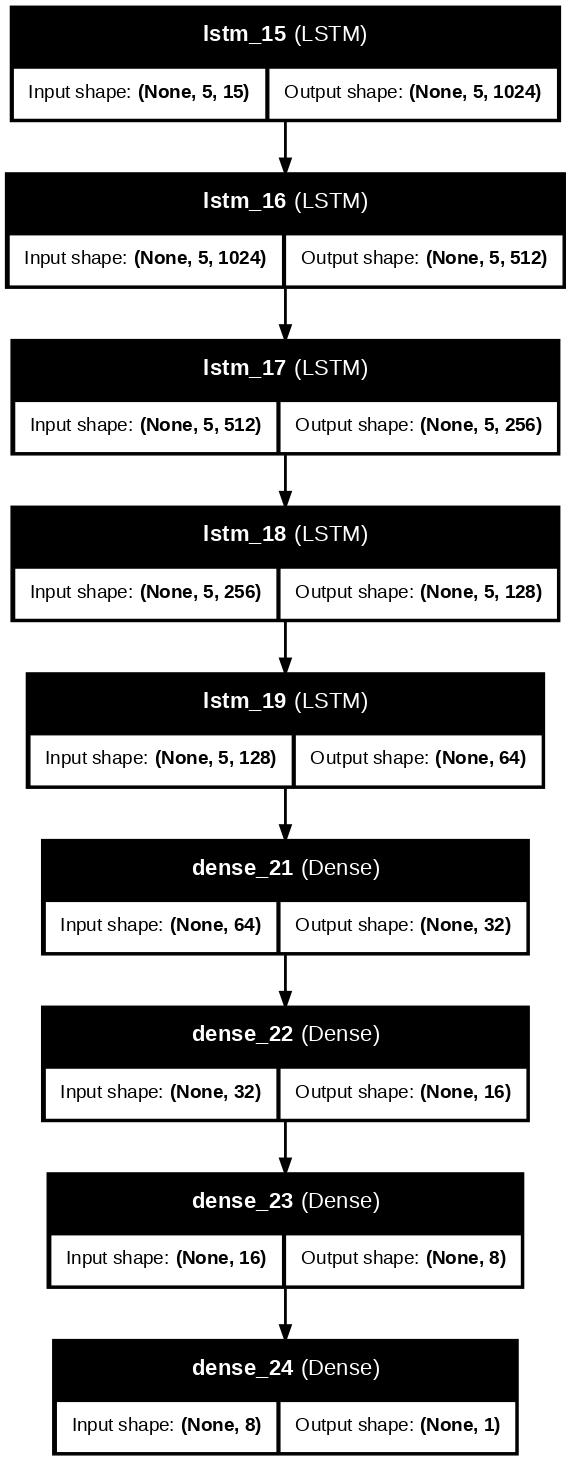

In [49]:
# Visualize the model architecture
plot_model(generator,
           to_file='generator_keras_model.png',  # Output file
           show_shapes=True,                         # Show input/output shapes
           show_layer_names=True,                    # Show layer names
           dpi=100)

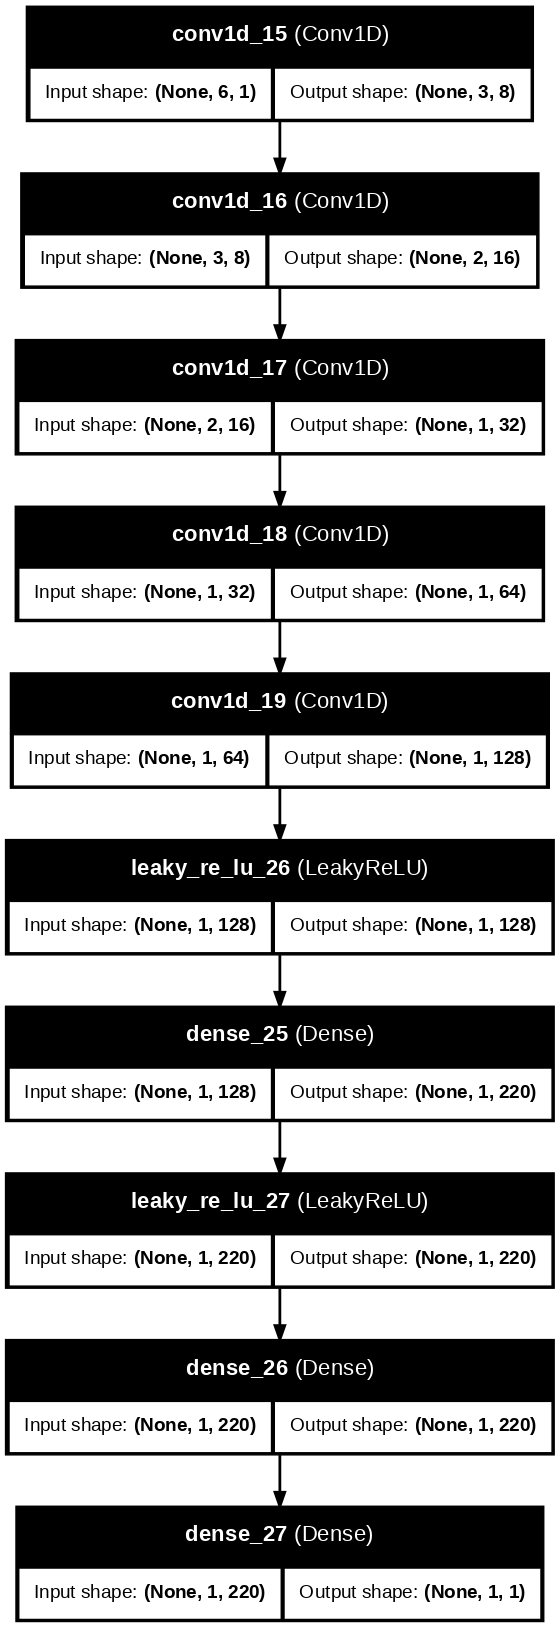

In [50]:
# Visualize the model architecture
plot_model(discriminator,
           to_file='discriminator_keras_model.png',  # Output file
           show_shapes=True,                         # Show input/output shapes
           show_layer_names=True,                    # Show layer names
           dpi=100)

  1%|          | 52/5000 [00:15<05:34, 14.78it/s]

epoch 50 discriminator_loss 1.4393528 generator_loss 0.6506241


  2%|▏         | 103/5000 [00:18<04:47, 17.02it/s]

epoch 100 discriminator_loss 1.3813612 generator_loss 0.69696486


  3%|▎         | 154/5000 [00:20<04:45, 16.95it/s]

epoch 150 discriminator_loss 1.3961756 generator_loss 0.6874558


  4%|▍         | 201/5000 [00:23<07:54, 10.12it/s]

epoch 200 discriminator_loss 1.3905265 generator_loss 0.6919622


  5%|▌         | 252/5000 [00:26<04:56, 16.00it/s]

epoch 250 discriminator_loss 1.3875811 generator_loss 0.6925418


  6%|▌         | 303/5000 [00:29<04:34, 17.11it/s]

epoch 300 discriminator_loss 1.3748354 generator_loss 0.70340407


  7%|▋         | 352/5000 [00:31<04:59, 15.50it/s]

epoch 350 discriminator_loss 1.3873358 generator_loss 0.6887752


  8%|▊         | 403/5000 [00:34<04:25, 17.31it/s]

epoch 400 discriminator_loss 1.3880389 generator_loss 0.69242275


  9%|▉         | 452/5000 [00:37<07:06, 10.67it/s]

epoch 450 discriminator_loss 1.3874829 generator_loss 0.6918547


 10%|█         | 502/5000 [00:40<04:40, 16.04it/s]

epoch 500 discriminator_loss 1.3870428 generator_loss 0.6929272


 11%|█         | 552/5000 [00:42<04:44, 15.62it/s]

epoch 550 discriminator_loss 1.3866533 generator_loss 0.69325066


 12%|█▏        | 602/5000 [00:45<04:34, 16.03it/s]

epoch 600 discriminator_loss 1.3864634 generator_loss 0.692624


 13%|█▎        | 652/5000 [00:47<04:26, 16.31it/s]

epoch 650 discriminator_loss 1.3866467 generator_loss 0.69456804


 14%|█▍        | 703/5000 [00:51<05:01, 14.23it/s]

epoch 700 discriminator_loss 1.3864074 generator_loss 0.6939085


 15%|█▌        | 750/5000 [00:53<04:31, 15.63it/s]

epoch 750 discriminator_loss 1.3865496 generator_loss 0.69330966


 16%|█▌        | 803/5000 [00:56<04:05, 17.09it/s]

epoch 800 discriminator_loss 1.386503 generator_loss 0.6940962


 17%|█▋        | 852/5000 [00:58<04:07, 16.78it/s]

epoch 850 discriminator_loss 1.3863246 generator_loss 0.6941681


 18%|█▊        | 903/5000 [01:01<05:45, 11.85it/s]

epoch 900 discriminator_loss 1.3862848 generator_loss 0.6943231


 19%|█▉        | 954/5000 [01:04<04:02, 16.67it/s]

epoch 950 discriminator_loss 1.386493 generator_loss 0.6939744


 20%|██        | 1002/5000 [01:07<04:17, 15.55it/s]

epoch 1000 discriminator_loss 1.3866704 generator_loss 0.6911102


 21%|██        | 1052/5000 [01:09<04:17, 15.36it/s]

epoch 1050 discriminator_loss 1.3863964 generator_loss 0.69257104


 22%|██▏       | 1104/5000 [01:12<03:53, 16.72it/s]

epoch 1100 discriminator_loss 1.3863227 generator_loss 0.6924566


 23%|██▎       | 1152/5000 [01:15<05:49, 11.02it/s]

epoch 1150 discriminator_loss 1.3862658 generator_loss 0.69438547


 24%|██▍       | 1203/5000 [01:18<03:44, 16.94it/s]

epoch 1200 discriminator_loss 1.3864563 generator_loss 0.69269514


 25%|██▌       | 1254/5000 [01:21<03:46, 16.51it/s]

epoch 1250 discriminator_loss 1.3862733 generator_loss 0.694148


 26%|██▌       | 1302/5000 [01:23<03:57, 15.59it/s]

epoch 1300 discriminator_loss 1.3849452 generator_loss 0.6984474


 27%|██▋       | 1352/5000 [01:26<03:49, 15.89it/s]

epoch 1350 discriminator_loss 1.3866237 generator_loss 0.69266486


 28%|██▊       | 1404/5000 [01:29<04:10, 14.38it/s]

epoch 1400 discriminator_loss 1.3865414 generator_loss 0.69253045


 29%|██▉       | 1454/5000 [01:32<03:32, 16.71it/s]

epoch 1450 discriminator_loss 1.3863662 generator_loss 0.69316953


 30%|███       | 1502/5000 [01:34<03:41, 15.80it/s]

epoch 1500 discriminator_loss 1.3861635 generator_loss 0.69440585


 31%|███       | 1554/5000 [01:37<03:27, 16.61it/s]

epoch 1550 discriminator_loss 1.3859715 generator_loss 0.6936953


 32%|███▏      | 1602/5000 [01:39<04:27, 12.69it/s]

epoch 1600 discriminator_loss 1.3868351 generator_loss 0.6925843


 33%|███▎      | 1652/5000 [01:43<03:35, 15.50it/s]

epoch 1650 discriminator_loss 1.3871651 generator_loss 0.69361436


 34%|███▍      | 1702/5000 [01:45<03:18, 16.62it/s]

epoch 1700 discriminator_loss 1.3857901 generator_loss 0.6943503


 35%|███▌      | 1753/5000 [01:48<03:13, 16.82it/s]

epoch 1750 discriminator_loss 1.3867202 generator_loss 0.6907969


 36%|███▌      | 1803/5000 [01:50<03:17, 16.19it/s]

epoch 1800 discriminator_loss 1.3863423 generator_loss 0.6930321


 37%|███▋      | 1852/5000 [01:53<04:44, 11.06it/s]

epoch 1850 discriminator_loss 1.3862505 generator_loss 0.6945751


 38%|███▊      | 1903/5000 [01:56<03:09, 16.34it/s]

epoch 1900 discriminator_loss 1.3862722 generator_loss 0.69470817


 39%|███▉      | 1954/5000 [01:59<02:58, 17.05it/s]

epoch 1950 discriminator_loss 1.3863696 generator_loss 0.6933451


 40%|████      | 2004/5000 [02:02<03:05, 16.19it/s]

epoch 2000 discriminator_loss 1.386199 generator_loss 0.69301087


 41%|████      | 2054/5000 [02:04<02:58, 16.52it/s]

epoch 2050 discriminator_loss 1.3863976 generator_loss 0.69467014


 42%|████▏     | 2103/5000 [02:07<03:47, 12.76it/s]

epoch 2100 discriminator_loss 1.3865173 generator_loss 0.69320196


 43%|████▎     | 2154/5000 [02:10<02:46, 17.11it/s]

epoch 2150 discriminator_loss 1.3862903 generator_loss 0.69209546


 44%|████▍     | 2202/5000 [02:12<03:10, 14.67it/s]

epoch 2200 discriminator_loss 1.3861599 generator_loss 0.69324535


 45%|████▌     | 2252/5000 [02:15<02:57, 15.49it/s]

epoch 2250 discriminator_loss 1.3862739 generator_loss 0.69493794


 46%|████▌     | 2302/5000 [02:18<03:12, 14.00it/s]

epoch 2300 discriminator_loss 1.3866467 generator_loss 0.6934294


 47%|████▋     | 2353/5000 [02:21<02:46, 15.89it/s]

epoch 2350 discriminator_loss 1.3859034 generator_loss 0.6935774


 48%|████▊     | 2401/5000 [02:24<02:56, 14.76it/s]

epoch 2400 discriminator_loss 1.3864229 generator_loss 0.69167453


 49%|████▉     | 2454/5000 [02:26<02:31, 16.80it/s]

epoch 2450 discriminator_loss 1.3862416 generator_loss 0.6921247


 50%|█████     | 2502/5000 [02:29<02:40, 15.60it/s]

epoch 2500 discriminator_loss 1.3863934 generator_loss 0.6916072


 51%|█████     | 2551/5000 [02:31<03:48, 10.71it/s]

epoch 2550 discriminator_loss 1.3862622 generator_loss 0.693279


 52%|█████▏    | 2604/5000 [02:35<02:25, 16.47it/s]

epoch 2600 discriminator_loss 1.3860924 generator_loss 0.69316345


 53%|█████▎    | 2652/5000 [02:37<02:25, 16.17it/s]

epoch 2650 discriminator_loss 1.3863716 generator_loss 0.69296765


 54%|█████▍    | 2704/5000 [02:40<02:18, 16.55it/s]

epoch 2700 discriminator_loss 1.3861935 generator_loss 0.6934059


 55%|█████▌    | 2752/5000 [02:42<02:28, 15.15it/s]

epoch 2750 discriminator_loss 1.3861806 generator_loss 0.69144464


 56%|█████▌    | 2801/5000 [02:45<03:32, 10.36it/s]

epoch 2800 discriminator_loss 1.3863964 generator_loss 0.6924117


 57%|█████▋    | 2852/5000 [02:48<02:14, 15.91it/s]

epoch 2850 discriminator_loss 1.3862505 generator_loss 0.69329935


 58%|█████▊    | 2902/5000 [02:51<02:16, 15.40it/s]

epoch 2900 discriminator_loss 1.3861482 generator_loss 0.69296217


 59%|█████▉    | 2953/5000 [02:53<02:00, 17.04it/s]

epoch 2950 discriminator_loss 1.3867236 generator_loss 0.6950688


 60%|██████    | 3002/5000 [02:56<02:07, 15.62it/s]

epoch 3000 discriminator_loss 1.3855188 generator_loss 0.6932548


 61%|██████    | 3054/5000 [02:59<02:22, 13.62it/s]

epoch 3050 discriminator_loss 1.3850808 generator_loss 0.6917715


 62%|██████▏   | 3102/5000 [03:02<01:53, 16.73it/s]

epoch 3100 discriminator_loss 1.3868976 generator_loss 0.690459


 63%|██████▎   | 3154/5000 [03:04<01:46, 17.28it/s]

epoch 3150 discriminator_loss 1.3863549 generator_loss 0.69297457


 64%|██████▍   | 3204/5000 [03:07<01:49, 16.46it/s]

epoch 3200 discriminator_loss 1.3861833 generator_loss 0.69305736


 65%|██████▌   | 3251/5000 [03:10<02:27, 11.85it/s]

epoch 3250 discriminator_loss 1.38711 generator_loss 0.6882037


 66%|██████▌   | 3303/5000 [03:13<01:44, 16.18it/s]

epoch 3300 discriminator_loss 1.3861475 generator_loss 0.6919384


 67%|██████▋   | 3352/5000 [03:15<01:45, 15.67it/s]

epoch 3350 discriminator_loss 1.3863763 generator_loss 0.6925662


 68%|██████▊   | 3403/5000 [03:18<01:33, 17.16it/s]

epoch 3400 discriminator_loss 1.3862619 generator_loss 0.6918348


 69%|██████▉   | 3454/5000 [03:21<01:30, 17.02it/s]

epoch 3450 discriminator_loss 1.3863328 generator_loss 0.69166917


 70%|███████   | 3502/5000 [03:24<02:15, 11.02it/s]

epoch 3500 discriminator_loss 1.3861487 generator_loss 0.69266695


 71%|███████   | 3554/5000 [03:27<01:27, 16.51it/s]

epoch 3550 discriminator_loss 1.3857896 generator_loss 0.69323957


 72%|███████▏  | 3602/5000 [03:29<01:28, 15.71it/s]

epoch 3600 discriminator_loss 1.3865881 generator_loss 0.6935076


 73%|███████▎  | 3653/5000 [03:32<01:18, 17.13it/s]

epoch 3650 discriminator_loss 1.3866057 generator_loss 0.6919773


 74%|███████▍  | 3702/5000 [03:34<01:23, 15.48it/s]

epoch 3700 discriminator_loss 1.3862827 generator_loss 0.6924637


 75%|███████▌  | 3754/5000 [03:38<01:38, 12.67it/s]

epoch 3750 discriminator_loss 1.3853428 generator_loss 0.7032951


 76%|███████▌  | 3802/5000 [03:40<01:14, 16.08it/s]

epoch 3800 discriminator_loss 1.3865626 generator_loss 0.6934106


 77%|███████▋  | 3852/5000 [03:43<01:14, 15.45it/s]

epoch 3850 discriminator_loss 1.3861749 generator_loss 0.6928726


 78%|███████▊  | 3903/5000 [03:45<01:03, 17.37it/s]

epoch 3900 discriminator_loss 1.3860536 generator_loss 0.69803756


 79%|███████▉  | 3951/5000 [03:48<01:14, 14.00it/s]

epoch 3950 discriminator_loss 1.3861457 generator_loss 0.6913297


 80%|████████  | 4004/5000 [03:51<01:03, 15.65it/s]

epoch 4000 discriminator_loss 1.3856982 generator_loss 0.69248194


 81%|████████  | 4054/5000 [03:54<00:56, 16.60it/s]

epoch 4050 discriminator_loss 1.38658 generator_loss 0.6932802


 82%|████████▏ | 4102/5000 [03:56<00:55, 16.08it/s]

epoch 4100 discriminator_loss 1.3867216 generator_loss 0.6943933


 83%|████████▎ | 4152/5000 [03:59<00:50, 16.82it/s]

epoch 4150 discriminator_loss 1.3859134 generator_loss 0.6947664


 84%|████████▍ | 4202/5000 [04:02<01:07, 11.81it/s]

epoch 4200 discriminator_loss 1.3859051 generator_loss 0.6948648


 85%|████████▌ | 4254/5000 [04:05<00:44, 16.82it/s]

epoch 4250 discriminator_loss 1.3861971 generator_loss 0.69599676


 86%|████████▌ | 4302/5000 [04:07<00:44, 15.51it/s]

epoch 4300 discriminator_loss 1.3858744 generator_loss 0.69072217


 87%|████████▋ | 4353/5000 [04:10<00:39, 16.28it/s]

epoch 4350 discriminator_loss 1.3869768 generator_loss 0.6970868


 88%|████████▊ | 4403/5000 [04:12<00:35, 16.86it/s]

epoch 4400 discriminator_loss 1.3861194 generator_loss 0.6923559


 89%|████████▉ | 4451/5000 [04:15<00:57,  9.53it/s]

epoch 4450 discriminator_loss 1.3862894 generator_loss 0.6916906


 90%|█████████ | 4502/5000 [04:18<00:35, 14.11it/s]

epoch 4500 discriminator_loss 1.383127 generator_loss 0.6958802


 91%|█████████ | 4552/5000 [04:21<00:29, 14.99it/s]

epoch 4550 discriminator_loss 1.3864309 generator_loss 0.69213784


 92%|█████████▏| 4602/5000 [04:23<00:25, 15.40it/s]

epoch 4600 discriminator_loss 1.386416 generator_loss 0.6937652


 93%|█████████▎| 4652/5000 [04:26<00:21, 16.47it/s]

epoch 4650 discriminator_loss 1.3862638 generator_loss 0.693541


 94%|█████████▍| 4704/5000 [04:30<00:20, 14.23it/s]

epoch 4700 discriminator_loss 1.386115 generator_loss 0.6934077


 95%|█████████▌| 4753/5000 [04:32<00:14, 17.14it/s]

epoch 4750 discriminator_loss 1.3858461 generator_loss 0.69330496


 96%|█████████▌| 4801/5000 [04:35<00:13, 14.79it/s]

epoch 4800 discriminator_loss 1.3664396 generator_loss 0.6970116


 97%|█████████▋| 4854/5000 [04:37<00:08, 16.89it/s]

epoch 4850 discriminator_loss 1.3875706 generator_loss 0.70196575


 98%|█████████▊| 4901/5000 [04:40<00:09, 10.46it/s]

epoch 4900 discriminator_loss 1.387696 generator_loss 0.69159645


 99%|█████████▉| 4953/5000 [04:43<00:02, 15.80it/s]

epoch 4950 discriminator_loss 1.3861828 generator_loss 0.69290924


100%|██████████| 5000/5000 [04:46<00:00, 17.48it/s]

epoch 5000 discriminator_loss 1.3860215 generator_loss 0.69356287


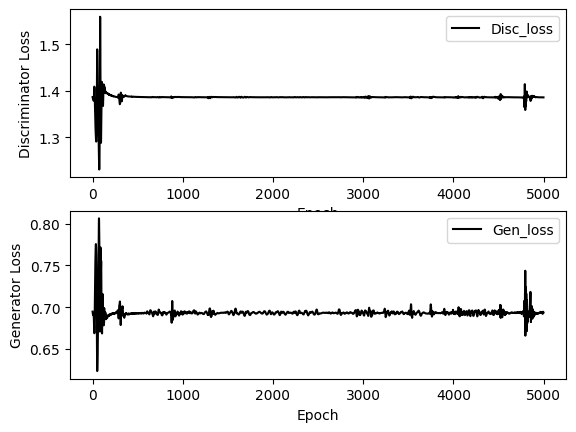

In [51]:
# Train the GAN model and get the predicted price, real price, and RMSPE
predicted_price, real_price, RMSPE = train(X_train, y_train, yc_train, epochs, generator, discriminator, g_optimizer, d_optimizer)

# test_generator = tf.keras.models.load_model(f'./models_gan/{stock_name}/generator_V_{epochs-1}.h5')

In [54]:
test_generator = tf.keras.models.load_model(f'/content/AMZN_generator_V_4999.keras')

In [55]:
# Load index files
index_train = np.load('index_train.npy', allow_pickle=True)  # Load training index data
index_test = np.load('index_test.npy', allow_pickle=True)  # Load testing index data

# Print the first few entries for verification
print(f"index_train: {index_train[:5]}")  # Print the first few entries of training index
print(f"index_test: {index_test[:5]}")  # Print the first few entries of testing index


index_train: ['2021-11-04T00:00:00.000000000' '2021-11-05T00:00:00.000000000'
 '2021-11-08T00:00:00.000000000' '2021-11-09T00:00:00.000000000'
 '2021-11-10T00:00:00.000000000']
index_test: ['2022-09-01T00:00:00.000000000' '2022-09-02T00:00:00.000000000'
 '2022-09-06T00:00:00.000000000' '2022-09-07T00:00:00.000000000'
 '2022-09-08T00:00:00.000000000']


Test RMSE:  5.938393837070654


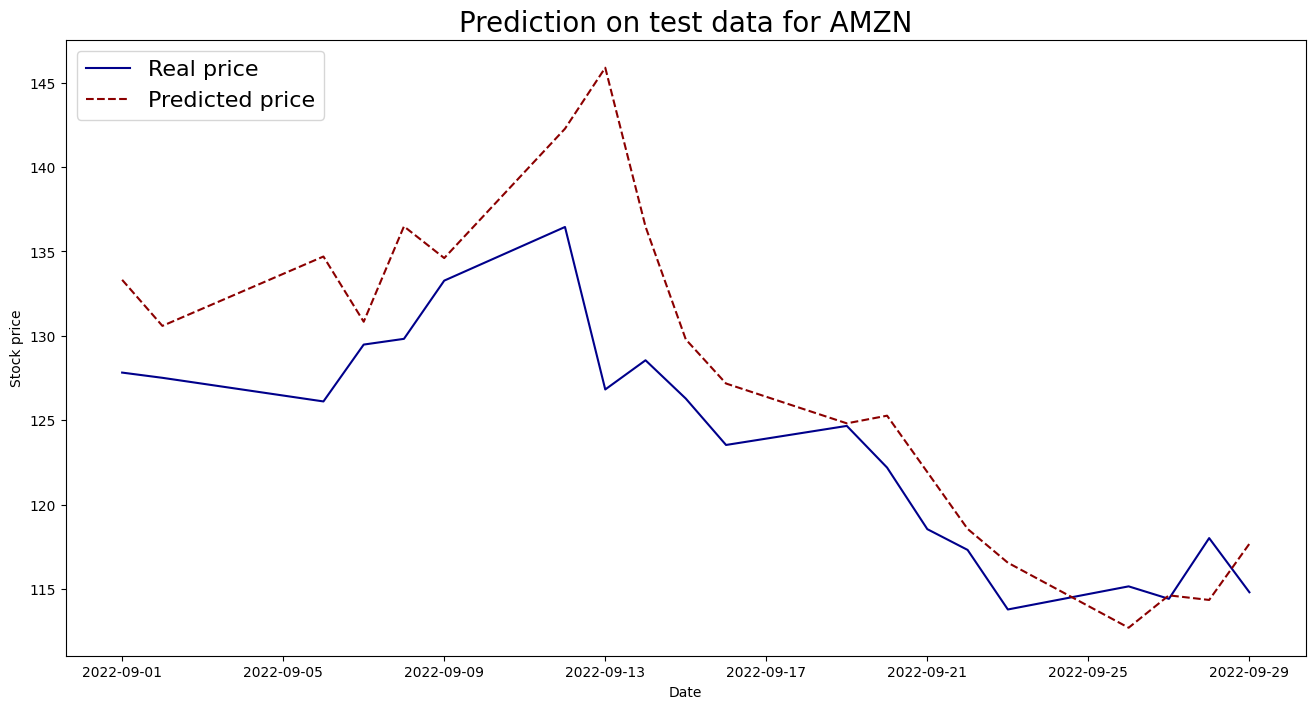

In [56]:
# Evaluate the test data using the trained generator model
predicted_test_data = eval_op(test_generator, X_test)

# Plot the actual vs predicted test data
plot_test_data(y_test, predicted_test_data, index_test)

In [57]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, accuracy_score

In [60]:
# Predict test data
predicted_test_data = eval_op(test_generator, X_test)

# Evaluate the model
evaluation_metrics = evaluate_model(test_generator, y_test, predicted_test_data, index_test)

# Access metrics if needed
mse = evaluation_metrics["MSE"]
mape = evaluation_metrics["MAPE"]
rmse = evaluation_metrics["RMSE"]


Mean Squared Error (MSE): 35.2645
Mean Absolute Percentage Error (MAPE): 0.0344
Root Mean Squared Error (RMSE): 5.9384
